<a href="https://colab.research.google.com/github/Max-JI64/Kakao_Tech_Boost/blob/main/Daily_class/25_10_22_CNN_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [59]:
import tensorflow as tf

# 데이터셋 불러오기

In [60]:
tf.keras.datasets.mnist

<module 'keras.datasets.mnist' from '/usr/local/lib/python3.12/dist-packages/keras/datasets/mnist/__init__.py'>

In [61]:
mnist = tf.keras.datasets.mnist.load_data()

In [62]:
(x_train, y_train), (x_test, y_test) = mnist

In [63]:
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [64]:
y_train.shape, y_test.shape

((60000,), (10000,))

# 이미지 출력

In [65]:
import numpy as np
np.set_printoptions(threshold=np.inf, linewidth=360) #데이터를 보는 옵션

In [66]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170, 253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253, 253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253, 253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253, 205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,  90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253, 190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190, 253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35, 241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39, 148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221, 253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253, 253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253, 195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,  11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0, 136, 253, 253, 253, 212, 135, 132,  16,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0

In [67]:
y_train[0]

np.uint8(5)

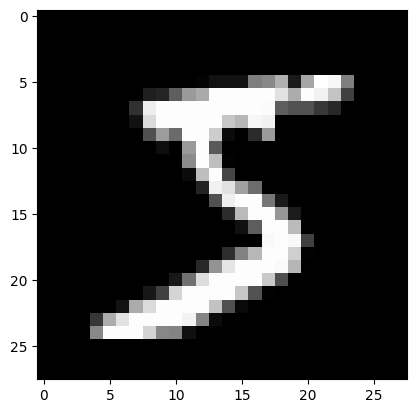

In [68]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0], cmap="gray")

# 모델 생성

In [69]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28), name = "input_flatten"), #이미지 크기 : 28, 28
    tf.keras.layers.Dense(2, activation="relu", name="hidden_layer"), #은닉층 두개의 뉴런
    # tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, name="output_layer")
])
model.name="baseline_model"

model.summary()

Model: "baseline_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer (Dense)            │ (None, 2)              │         1,570 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 10)             │            30 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,600 (6.25 KB)

 Trainable params: 1,600 (6.25 KB)

 Non-trainable params: 0 (0.00 B)

In [70]:
print(f"Input Layer:{x_train[0].shape}")

for layer in model.layers:
    #훈련가능한 가중치라면
    if layer.get_weights():
        weights=layer.get_weights()
        print(f"\nLayer: {layer.name}")
        print(f"Weight matrix shape: {weights[0].shape}")
        print(f"Bias vector shape: {weights[1].shape}")
        print(f"Total parameters: {weights[0].shape[0]} * {weights[1].shape[0]} + {weights[1].size} = {weights[0].size + weights[1].size}")
        print(f"  - Weights: {weights[0].size}");
        print(f"  - Biases: {weights[1].size}")

Input Layer:(28, 28)

Layer: hidden_layer
Weight matrix shape: (784, 2)
Bias vector shape: (2,)
Total parameters: 784 * 2 + 2 = 1570
  - Weights: 1568
  - Biases: 2

Layer: output_layer
Weight matrix shape: (2, 10)
Bias vector shape: (10,)
Total parameters: 2 * 10 + 10 = 30
  - Weights: 20
  - Biases: 10


# 피드포워드 계산

In [71]:
predictions = model(x_train[:1]).numpy()
print(predictions)

[[-114.86907    33.624714 -142.41508   -47.694126  147.30403  -116.30196   -99.08244    26.413319  -88.59667   155.19014 ]]


In [72]:
# Hidden layer (2개 뉴런 모두) 계산
input_flat = x_train[0].flatten()  # (784,)
W1 = model.layers[1].get_weights()[0]  # (784, 2)
b1 = model.layers[1].get_weights()[1]  # (2,)

# 행렬 곱셈: input @ weights + bias
hidden_output = np.dot(input_flat, W1) + b1  # (784,) @ (784,2) + (2,) = (2,)
print(f'MM: {input_flat.shape} @ {W1.shape} + {b1.shape} = {hidden_output.shape}')
print("Hidden layer output (before ReLU):", hidden_output)

# ReLU 활성화 함수 적용: max(0, x)
hidden_output_relu = np.maximum(0, hidden_output)  # (2,)
print("Hidden layer output (after ReLU):", hidden_output_relu)

MM: (784,) @ (784, 2) + (2,) = (2,)
Hidden layer output (before ReLU): [-335.47336  224.03946]
Hidden layer output (after ReLU): [  0.      224.03946]


In [73]:
# Output layer (10개 뉴런) 계산
W2 = model.layers[2].get_weights()[0]  # (2, 10)
b2 = model.layers[2].get_weights()[1]  # (10,)

# 행렬 곱셈: hidden @ weights + bias
output_logits = np.dot(hidden_output_relu, W2) + b2  # (2,) @ (2,10) + (10,) = (10,)
print(f'MM: {hidden_output.shape} @ {W2.shape} + {b2.shape} = {output_logits.shape}\n')
print("Output layer(logits):  ", output_logits)
print("model prediction:\t", model(x_train[0:1]).numpy()[0])

MM: (2,) @ (2, 10) + (10,) = (10,)

Output layer(logits):   [-114.86908    33.624714 -142.4151    -47.69413   147.30405  -116.30197   -99.08245    26.41332   -88.59668   155.19016 ]
model prediction:	 [-114.86907    33.624714 -142.41508   -47.694126  147.30403  -116.30196   -99.08244    26.413319  -88.59667   155.19014 ]


In [74]:
tf.nn.softmax(output_logits)

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.7578843e-04, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.9962413e-01], dtype=float32)>